# Demonstration of PageRank Algorithm

In [3]:
def pagerank(graph, damping=0.85, epsilon=1.0e-8):
    """ Pure Python implementation of the PageRank algorithm
    
    Paramters
    ---------
    
    graph   : iterable containing edges of the graph
    damping : float, describing the decay factor after visiting
              a node, in range 0...1
    epsilon : float, convergence threshold of the algorithm
    
    Reference
    ---------
    
    Taken from http://dpk.io/pagerank
    
    Note:
    ----
    
    The PageRank algorithm is subject to a patent held by Stanford University under
    exclusive licence to Google, Inc. This page presents a description of the algorithm
    for educational purposes. I am not responsible for your use of this information.
    """
    inlink_map = {}
    outlink_counts = {}
    
    def new_node(node):
        if node not in inlink_map: inlink_map[node] = set()
        if node not in outlink_counts: outlink_counts[node] = 0
    
    for tail_node, head_node in graph:
        new_node(tail_node)
        new_node(head_node)
        if tail_node == head_node: continue
        
        if tail_node not in inlink_map[head_node]:
            inlink_map[head_node].add(tail_node)
            outlink_counts[tail_node] += 1
    
    all_nodes = set(inlink_map.keys())
    for node, outlink_count in outlink_counts.items():
        if outlink_count == 0:
            outlink_counts[node] = len(all_nodes)
            for l_node in all_nodes: inlink_map[l_node].add(node)
    
    initial_value = 1 / len(all_nodes)
    ranks = {}
    for node in inlink_map.keys(): ranks[node] = initial_value
    
    new_ranks = {}
    delta = 1.0
    n_iterations = 0
    rank_history = []
    while delta > epsilon:
        new_ranks = {}
        for node, inlinks in inlink_map.items():
            new_ranks[node] = ((1 - damping) / len(all_nodes)) + (damping * sum(ranks[inlink] / outlink_counts[inlink] for inlink in inlinks))
        delta = sum(abs(new_ranks[node] - ranks[node]) for node in new_ranks.keys())
        ranks, new_ranks = new_ranks, ranks
        n_iterations += 1
        rank_history.append(ranks)
    
    return ranks, n_iterations, rank_history

## Graph Visualizations

Generate a random graph and display ranking probabilites calculated by pagerank.

In [4]:
import graphviz as gv
import numpy as np
from IPython.display import Image
from IPython.display import display

In [5]:
graph = []

nb_nodes = 10
probs = 0.2 * np.ones((nb_nodes, nb_nodes)) + 0.1 * np.eye(nb_nodes)

for i in range(nb_nodes):
    for j in range(nb_nodes):
        if np.random.uniform(0,1) < probs[i,j]:
            graph.append((i,j))
            
ranks, _, history = pagerank(graph)

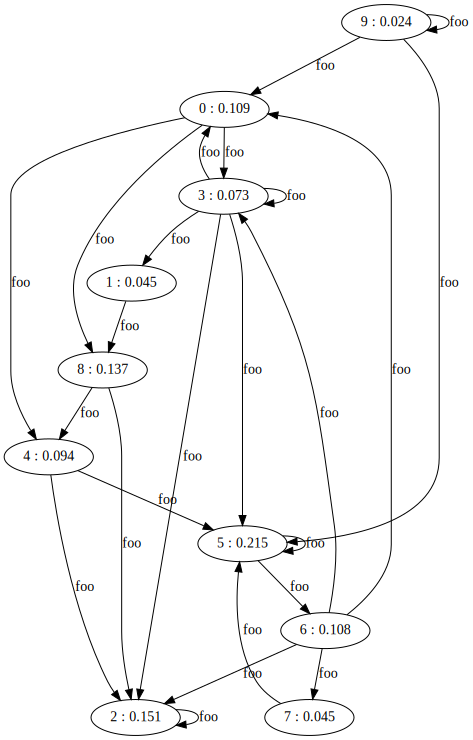

In [8]:
for t in range(len(history)):
    
    g1 = gv.Digraph(format='svg')
    
    for x,y in graph:
        g1.edge(str(x), str(y), label="foo")
    
    for i in ranks.keys():
        g1.node(str(i), label="{} : {:.3f}".format(i, history[t][i]))

    display(g1)
    
    break

In [26]:

g1 = gv.Digraph(format='eps')

for i in list("bca"):
    g1.node(i, label=i)


for nodes, probs in zip(("ab", "ac", "bc", "cb"),("2/3", "1/3", "1", "1")):
    n,m = nodes
    g1.edge(n,m, label=(probs))

#display(g1)

g1.render("markov_graph.eps")

'markov_graph.eps.eps'

In [22]:
help(g1.render)

Help on method render in module graphviz.files:

render(filename=None, directory=None, view=False, cleanup=False) method of graphviz.dot.Digraph instance
    Save the source to file and render with the Graphviz engine.
    
    Args:
        filename: Filename for saving the source (defaults to name + '.gv')
        directory: (Sub)directory for source saving and rendering.
        view: Open the rendered result with the default application.
        cleanup: Delete the source file after rendering.
    Returns:
        The (possibly relative) path of the rendered file.
    Raises:
        RuntimeError: If the Graphviz executable is not found.
        RuntimeError: If viewer opening is requested but not supported.

